In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
df=pd.read_csv("/content/State & UT-wise Gross Enrolment Ratio (GER) in Higher Education (18-23 years) from 2010-11 to 2015-16.csv")

In [25]:
df.head()

,Year,Country/ State/ UT Name,All Categories - Male,All Categories - Female,All Categories - Total,SC - Male,SC - Female,SC - Total,ST - Male,ST - Female,ST - Total
0,2010-11,Andaman & Nicobar Islands,9.6,13.4,11.4,NaN,NaN,NaN,4.4,8.8,6.6
1,2010-11,Andhra Pradesh,32.1,24.4,28.4,29.8,21.9,25.9,31.5,16.8,23.8
2,2010-11,Arunachal Pradesh,33.6,19.5,26.9,100.0,66.0,100.0,24.3,16.1,20.1
3,2010-11,Assam,13.3,13.4,13.4,10.4,12.2,11.2,13.5,13.2,13.4
4,2010-11,Bihar,11.8,9.1,10.5,7.0,4.7,5.9,20.9,19.7,20.3


In [26]:
df.isnull().sum()

,0
Year,0
Country/ State/ UT Name,0
All Categories - Male,0
All Categories - Female,0
All Categories - Total,0
SC - Male,23
SC - Female,23
SC - Total,23
ST - Male,30
ST - Female,30


<Axes: >

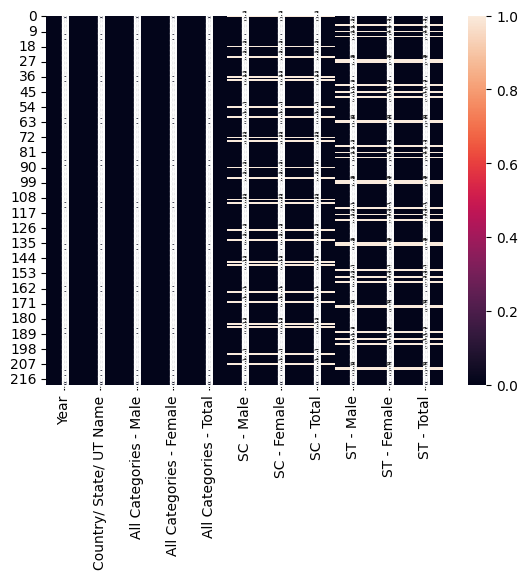

In [27]:
sns.heatmap(df.isnull(),annot=True)

In [28]:
df = df.drop_duplicates()

In [29]:
import numpy as np

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for each numeric column
for column in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, column)

# Check the shape after removing outliers
print(f"Shape after outlier removal: {df.shape}")


Shape after outlier removal: (131, 11)


In [45]:
# Get summary statistics
from tabulate import tabulate
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))


+-------+-------------------------+---------------------------+--------------------------+-------------+---------------+--------------+-------------+---------------+--------------+
|       |   All Categories - Male |   All Categories - Female |   All Categories - Total |   SC - Male |   SC - Female |   SC - Total |   ST - Male |   ST - Female |   ST - Total |
|-------+-------------------------+---------------------------+--------------------------+-------------+---------------+--------------+-------------+---------------+--------------|
| count |               131       |                 131       |                131       |   131       |     131       |    131       |   131       |     131       |    131       |
| mean  |                19.8969  |                  18.6992  |                 19.2573  |    17.1397  |      15.9     |     16.5183  |    13.7603  |      11.9939  |     12.8695  |
| std   |                 7.54731 |                   7.43403 |                  7.29037 |     

In [31]:
df2=pd.read_csv("/content/online_classroom_data.csv")

In [32]:
df2.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [33]:
df2.isnull().sum()

,0
Unnamed: 0,0
total_posts,0
helpful_post,0
nice_code_post,0
collaborative_post,0
confused_post,0
creative_post,0
bad_post,0
amazing_post,0
timeonline,0


<Axes: >

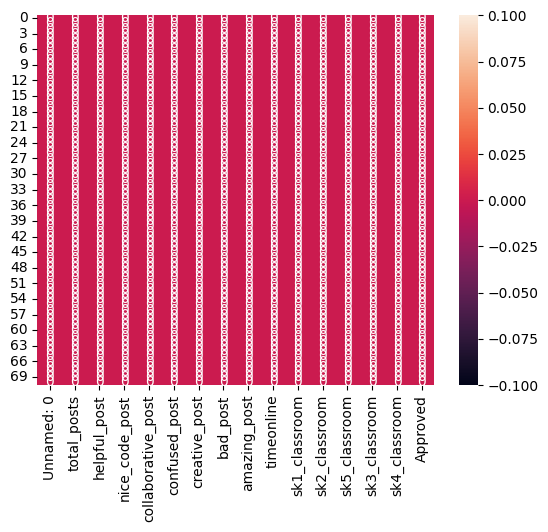

In [34]:
sns.heatmap(df2.isnull(),annot=True)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [36]:
# Convert relevant columns to numeric type
for col in df2.columns:
    try:
        # Attempt to convert the column to numeric, replacing commas with periods
        df2[col] = pd.to_numeric(df2[col].str.replace(',', '.'))
    except:
        print(f"Could not convert column {col} to numeric")

# Fill missing values with median
df2.fillna(df2.median(), inplace=True)

Could not convert column Unnamed: 0 to numeric
Could not convert column total_posts to numeric
Could not convert column helpful_post to numeric
Could not convert column nice_code_post to numeric
Could not convert column collaborative_post to numeric
Could not convert column confused_post to numeric
Could not convert column creative_post to numeric
Could not convert column bad_post to numeric
Could not convert column amazing_post to numeric
Could not convert column timeonline to numeric
Could not convert column Approved to numeric


In [37]:
# Select numerical features for K-Means clustering
features = df2.select_dtypes(include=[np.number]).columns
X = df2[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])


[[-1.70782513 -0.70043182 -0.59283811 -0.59090017 -0.81936915 -0.40977782
  -0.56529985 -0.19754592 -0.81885224 -0.85895162 -0.95327712 -0.82420231
  -0.37639504 -0.5213141  -1.35255873 -1.5430335 ]
 [-1.65903012 -0.70043182 -0.59283811 -0.59090017 -0.74728091 -0.40977782
  -0.74898996 -0.19754592 -0.72765458 -0.95871087 -1.49861649 -1.47030411
  -1.39862637 -1.5102191  -1.74431153 -1.5430335 ]
 [-1.61023512 -0.54502351 -0.00414572 -0.35387242 -0.17057499 -0.40977782
  -0.10607457  3.30889415 -0.49966042 -0.9074457   0.83422416 -0.02426673
   0.0617041   0.43933646 -0.49070257  0.64807407]
 [-1.56144012 -0.07879858 -0.44566501 -0.35387242 -0.17057499  1.08223373
  -0.33568721 -0.19754592 -0.49966042 -0.16113166  0.22829152 -0.02426673
  -0.23036199  0.15679218 -0.7518711   0.64807407]
 [-1.51264511  1.3198762   0.29020047  0.59423859  1.19910157 -0.40977782
   1.45529137 -0.19754592  1.1874963   2.36461831  1.04630058  1.20640337
   0.49980325  1.28696932  0.50173786  0.64807407]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

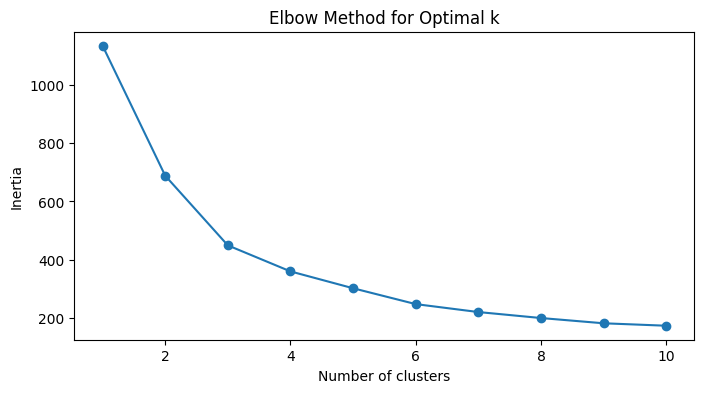

In [38]:
# Calculate inertia for different numbers of clusters (Elbow method)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

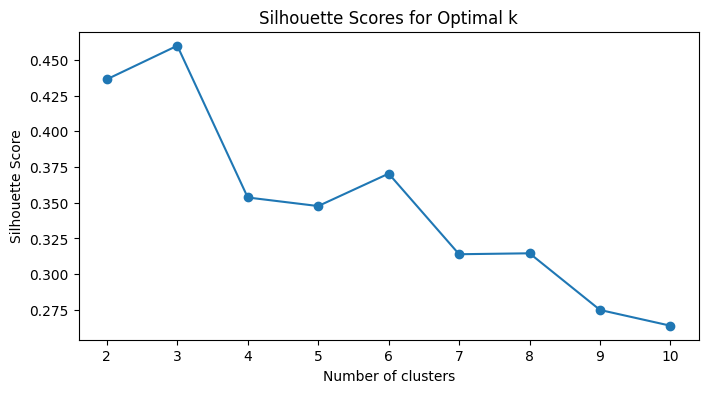

In [39]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [40]:
# Set optimal number of clusters based on analysis (e.g., 3)
optimal_k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
df2['Cluster'] = cluster_labels

# Check cluster assignment
print(df2.head())


   Unnamed: 0  total_posts  helpful_post  nice_code_post  collaborative_post  \
0           0          1.0           0.0             0.0                 0.0   
1           1          1.0           0.0             0.0                 1.0   
2           2          2.0           4.0             3.0                 9.0   
3           3          5.0           1.0             3.0                 9.0   
4           4         14.0           6.0            15.0                28.0   

   confused_post  creative_post  bad_post  amazing_post  timeonline  \
0            0.0            6.0       0.0           1.0      1600.0   
1            0.0            2.0       0.0           3.0       592.0   
2            0.0           16.0       1.0           8.0      1110.0   
3            2.0           11.0       0.0           8.0      8651.0   
4            0.0           50.0       0.0          45.0     34172.0   

   sk1_classroom  sk2_classroom  sk5_classroom  sk3_classroom  sk4_classroom  \
0           

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


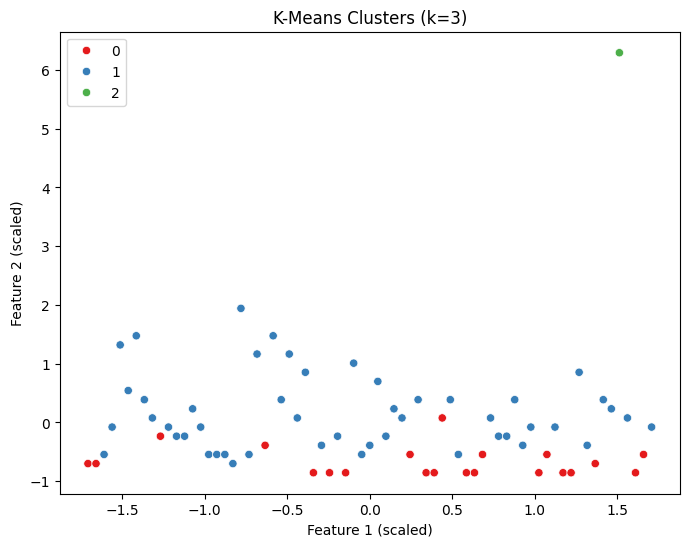

In [41]:
# Visualizing clusters in 2D using the first two features (or PCA components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='Set1')
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


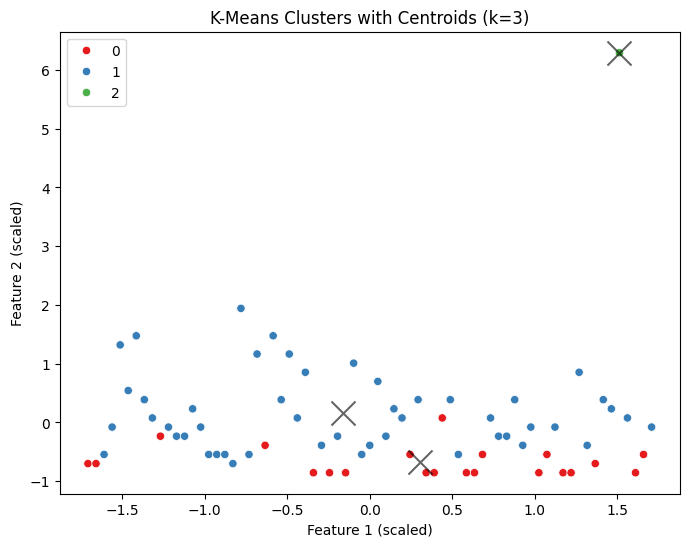

In [42]:
# Visualizing the cluster centers
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='Set1')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, marker='x')  # Plotting the cluster centers
plt.title(f'K-Means Clusters with Centroids (k={optimal_k})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


In [43]:
# Evaluate the silhouette score for the optimal number of clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')


Silhouette Score for k=3: 0.4599527445161694
